In [1]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

## 1. EDA

In [2]:

with open(r'Data/churn_model_pd2.pcl', 'rb') as f:
    bdl_data = pickle.load(f)
gen_info, train_data, test_data = bdl_data
train_info, df_train_fe, df_train_bnum, df_train_dpi = train_data
test_info, df_test_fe, df_test_bnum, df_test_dpi = test_data


In [3]:
df_train_fe_df = pd.DataFrame(df_train_fe)
df_train_bnum_df = pd.DataFrame(df_train_bnum)
df_train_dpi_df = pd.DataFrame(df_train_dpi)

In [43]:
# sort by sum descending

df_train_fe_df.isnull().sum().sort_values(ascending=False)

bs_of_recall_m1                     150000
bs_of_succ_m1                       150000
bs_of_succ_but_drop_m1              150000
bs_of_unsucc_attemp_equip_m1        150000
bs_recall_rate                      150000
                                     ...  
voice_mts_in_nrest_part_td_mnt3          0
voice_out_cmpttrs_td_cntstd_mnt1         0
accum_oth_dur_mea_mnt3                   0
voice_mts_out_dwork_partmin_mnt1         0
abon_id                                  0
Length: 817, dtype: int64

In [42]:
# convert df_train_fe to a dataframe

nulls = df_train_fe_df.isnull().sum()
nulls = nulls[nulls > len(df_train_fe_df) * 0.5]
len(nulls)



63

In [31]:
# missing data
df_train_fe_df.isnull().sum()

Ama_rchrgmnt_sum_max_mnt1           817
content_clc_mea_mnt1                817
content_cnt_max_mnt1                817
voice_out_short_part_max_mnt1       817
voice_mts_in_nrest_part_std_mnt1    817
                                   ... 
MV_DOU_PPM_VF                       817
MV_DOU_Neg_Bal                      817
MV_ot_total                         817
target                              817
abon_id                             817
Length: 817, dtype: int64

In [44]:
corr = df_train_fe_df.corr()


,Ama_rchrgmnt_sum_max_mnt1,content_clc_mea_mnt1,content_cnt_max_mnt1,voice_out_short_part_max_mnt1,voice_mts_in_nrest_part_std_mnt1,num_act_days_max_mnt1,sms_roam_clc_min_mnt1,voice_in_cmpttrs_avg_durmin_mnt1,com_num_part_mea_mnt1,pay_avg_mea_mnt1,...,MV_Traf_mn_out_v_Min,MV_DOU_OT,MV_SERV_Y_WO_AF,MV_Migr_To,MV_SERV_RLH,MV_DOU_PPM_VF,MV_DOU_Neg_Bal,MV_ot_total,target,abon_id
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# remove columns where NaNs are more than 70%
frame.dropna(thresh=threshold*frame.shape[0], axis=1)
df_train_fe_df_clean = df_train_fe_df.dropna(thresh=0.7*len(df_train_fe_df), axis=1)

In [21]:
df_train_fe_df_clean

""
1
2
3


/Users/andriigerasymchuk/private-repositories/ml-projects/venv/lib/python3.11/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Users/andriigerasymchuk/private-repositories/ml-projects/venv/lib/python3.11/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


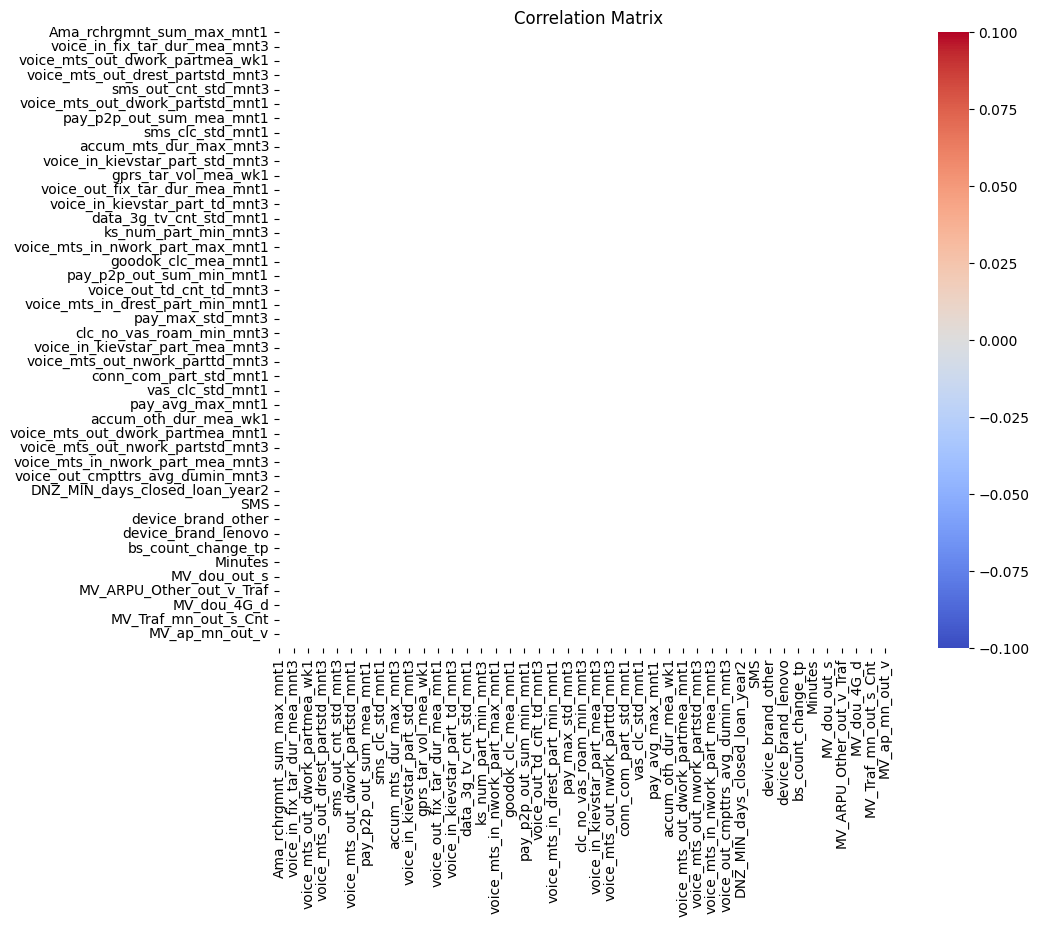

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()